# PROBLEM1: A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [21]:
df_fever=pd.read_csv('Fever-1.csv')

In [22]:
df_fever.shape

(36, 4)

In [23]:
df_fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [24]:
df_fever.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [25]:
df_fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

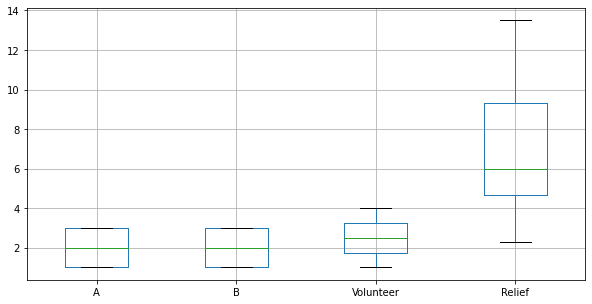

In [26]:
df_fever.boxplot(figsize=(10,5))

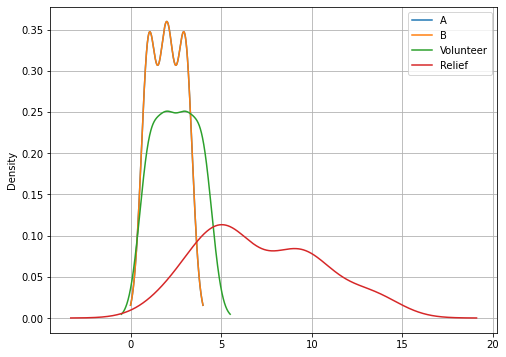

In [27]:
plt.figure(figsize=(8,6))
for i in df_fever.columns:
    df_fever[i].plot(kind='kde')
    plt.legend()
    plt.grid()
plt.show()


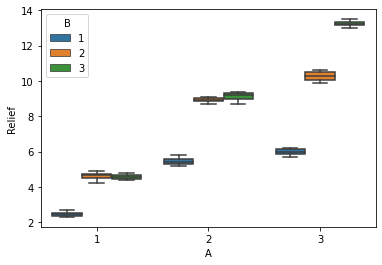

In [28]:
sns.boxplot(x='A', y='Relief', data=df_fever,hue='B')
plt.show()

In [29]:
df_fever[df_fever['A']==3]

A  B  Volunteer  Relief
24  3  1          1     6.1
25  3  1          2     5.7
26  3  1          3     5.9
27  3  1          4     6.2
28  3  2          1     9.9
29  3  2          2    10.5
30  3  2          3    10.6
31  3  2          4    10.1
32  3  3          1    13.5
33  3  3          2    13.0
34  3  3          3    13.3
35  3  3          4    13.2

In [30]:
df_fever['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [31]:
df_fever['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [32]:
import scipy.stats as stats
stats.shapiro(df_fever[df_fever['A']==1]),stats.shapiro(df_fever[df_fever['A']==2]),stats.shapiro(df_fever[df_fever['A']==3])

((0.844001293182373, 1.5126366633921862e-05),
 (0.7621452212333679, 1.999984391432008e-07),
 (0.7417868375778198, 7.870296059309112e-08))

In [33]:
stats.shapiro(df_fever[df_fever['B']==1]),stats.shapiro(df_fever[df_fever['B']==2]),stats.shapiro(df_fever[df_fever['B']==3])

((0.8212789297103882, 4.081792667420814e-06),
 (0.7416667938232422, 7.828199244386269e-08),
 (0.7183175086975098, 2.837345824957538e-08))

In [34]:
stats.levene(df_fever[df_fever['A']==1]['Relief'],df_fever[df_fever['A']==2]['Relief'],df_fever[df_fever['A']==3]['Relief'])

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

In [35]:
stats.levene(df_fever[df_fever['B']==1]['Relief'],df_fever[df_fever['B']==2]['Relief'],df_fever[df_fever['B']==3]['Relief'])

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

#  State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

𝐻0 : The mean ingredients of 3 groups  from column A are same

𝐻A : The mean of ingredients of 3 groups from column A are different

In [36]:
#ONE Way Anova:Alternate and Null Hypothesis for Column B

𝐻0 : The mean ingredients of 3 groups  from column B are same

𝐻A : The mean of ingredients of 3 groups from column B are different

#  Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [37]:
formula = 'Relief ~ C(A)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


#  Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [38]:
formula = 'Relief ~ C(B)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Conclusion: Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that the mean of ingredients of 3 groups from column B are different

# Analyse the effects of one variable on another with the help of an interaction plot.
What is an interaction between two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


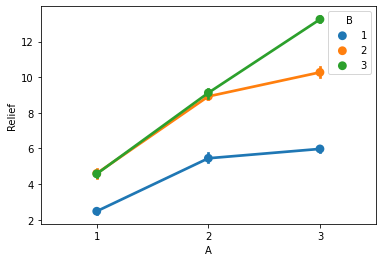

In [18]:
from numpy import mean
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df_fever,estimator=mean)
plt.show()

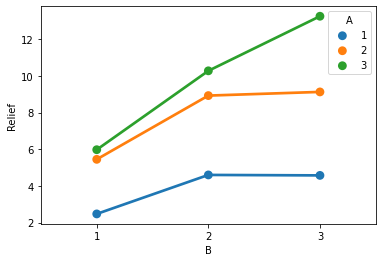

In [19]:
sns.pointplot(x = 'B', y = 'Relief', hue='A',data=df_fever,ci=None,estimator=mean)
plt.show()

In [ ]:
Conclusion:
    There is no interaction between two treatments.

#  Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [40]:
# Anova for 2 different Ingredients 
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [41]:
# Anova for 2 different Ingredients  and interaction between 2 ingredients
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


Conclusion : 
    
    1) P Value from two way anova for two Ingredients A,B are less than 0.05.These Treatments are not significant wrt to Relief
    
    2) Interactive between 2 Ingredients  are less than 0.05.There is no Interaction between these 2 Ingredients.So this component als is not significant

#  Mention the business implications of performing ANOVA for this particular case study.

#Business Implication : 

    1) P Value from two way anova for two Ingredients A,B are less than 0.05.These Treatments are not significant wrt to Relief
    
    2) Interactive between 2 Ingredients  are less than 0.05.There is no Interaction between these 2 Ingredients.So this component als is not significant
    
    3)Business can take a decision go with different Ingredients ,which can bring Releif for severe hay fever

# Problem 2: The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_education=pd.read_csv('Education - Post 12th Standard-1.csv')

#  Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

# EDA

In [3]:
#Count and Column check
df_education.shape

(777, 18)

In [4]:
#Data Type check
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [5]:
#Null Check
df_education.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
# Check for duplicate data
dups = df_education.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_education[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [7]:
#Unique check for Object Datatype
df_education.Names.unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

In [9]:
#Describe before outlier treatment
df_education.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

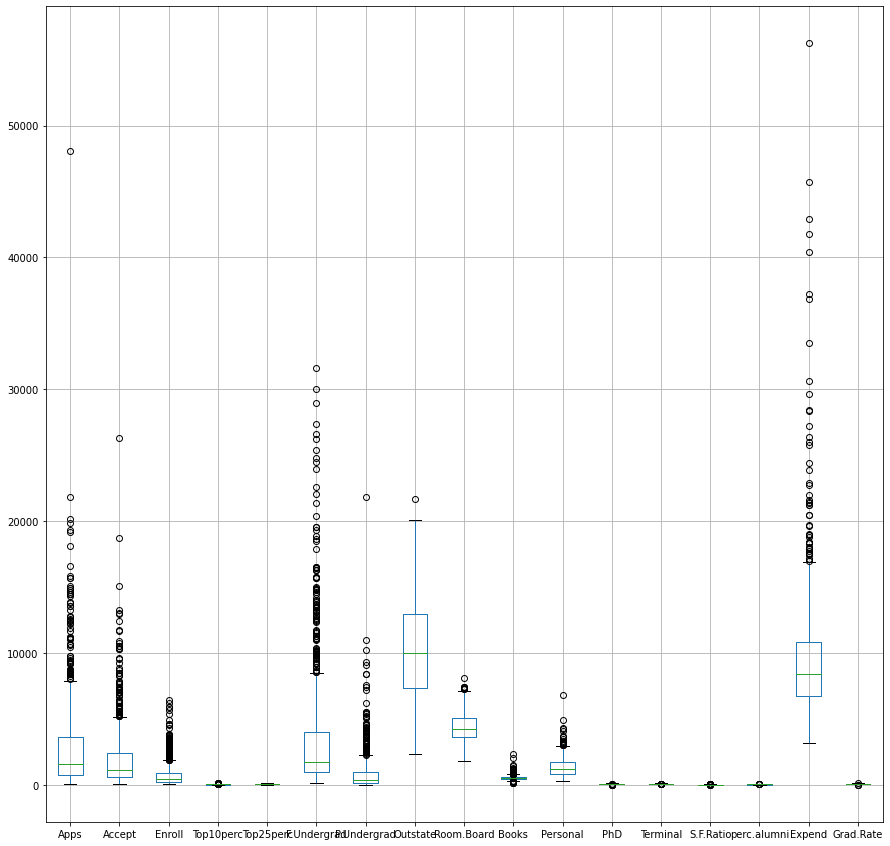

In [12]:
#Checking Outlier for all columns
df_education.boxplot(figsize=(15,15))

# Univariate Analysis

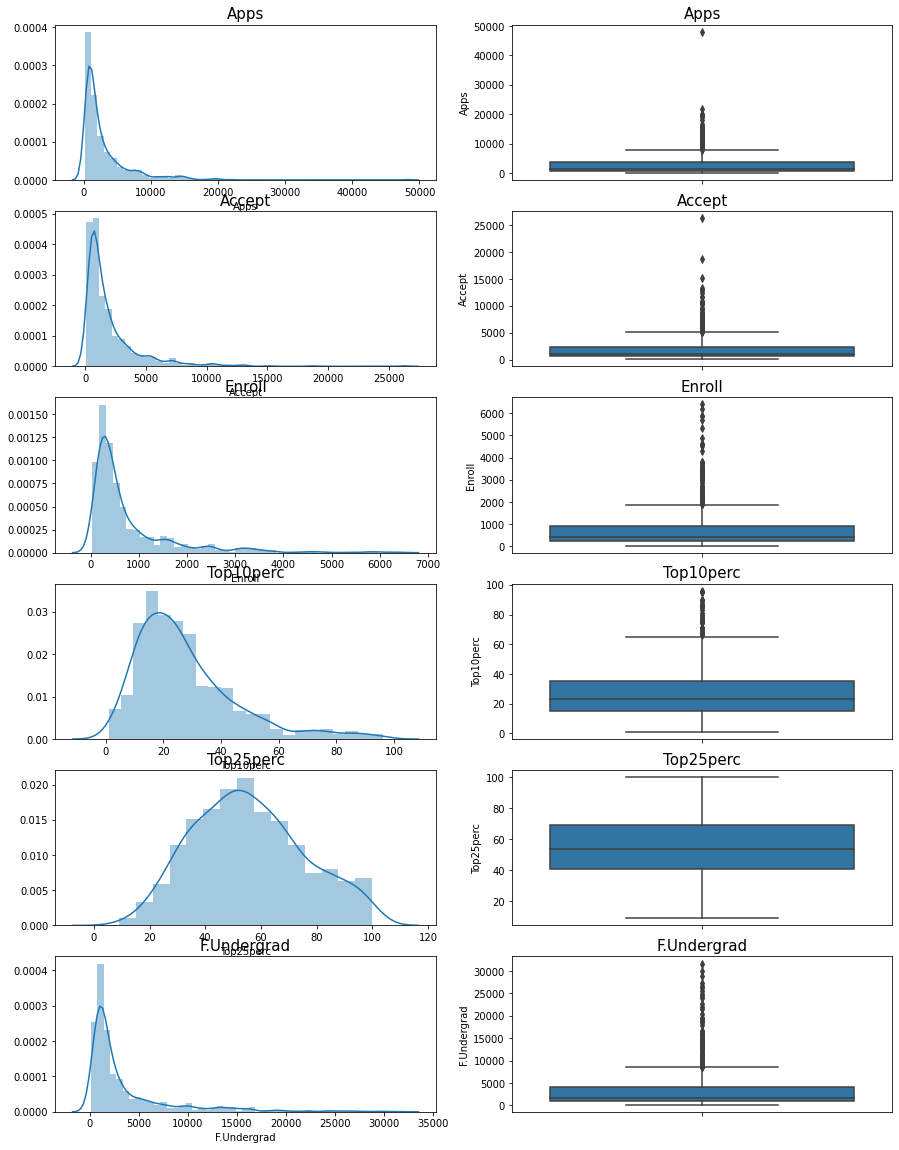

In [11]:
## Outlier check for below columns using boxplots

#Apps       
#Accept     
#Enroll     
#Top10perc  
#Top25perc  --no outlier issue 
#F.Undergrad

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15, 20)

a = sns.distplot(df_education['Apps'] , ax=axes[0][0])
a.set_title("Apps",fontsize=15)
a = sns.boxplot(df_education['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps",fontsize=15)

a = sns.distplot(df_education['Accept'] , ax=axes[1][0])
a.set_title("Accept",fontsize=15)
a = sns.boxplot(df_education['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept",fontsize=15)

a = sns.distplot(df_education['Enroll'] , ax=axes[2][0])
a.set_title("Enroll",fontsize=15)
a = sns.boxplot(df_education['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll",fontsize=15)


a = sns.distplot(df_education['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc",fontsize=15)
a = sns.boxplot(df_education['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc",fontsize=15)

a = sns.distplot(df_education['Top25perc'] , ax=axes[4][0])
a.set_title("Top25perc",fontsize=15)
a = sns.boxplot(df_education['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title("Top25perc",fontsize=15)

a = sns.distplot(df_education['F.Undergrad'] , ax=axes[5][0])
a.set_title("F.Undergrad",fontsize=15)
a = sns.boxplot(df_education['F.Undergrad'] , orient = "v" , ax=axes[5][1])
a.set_title("F.Undergrad",fontsize=15)

plt.show()

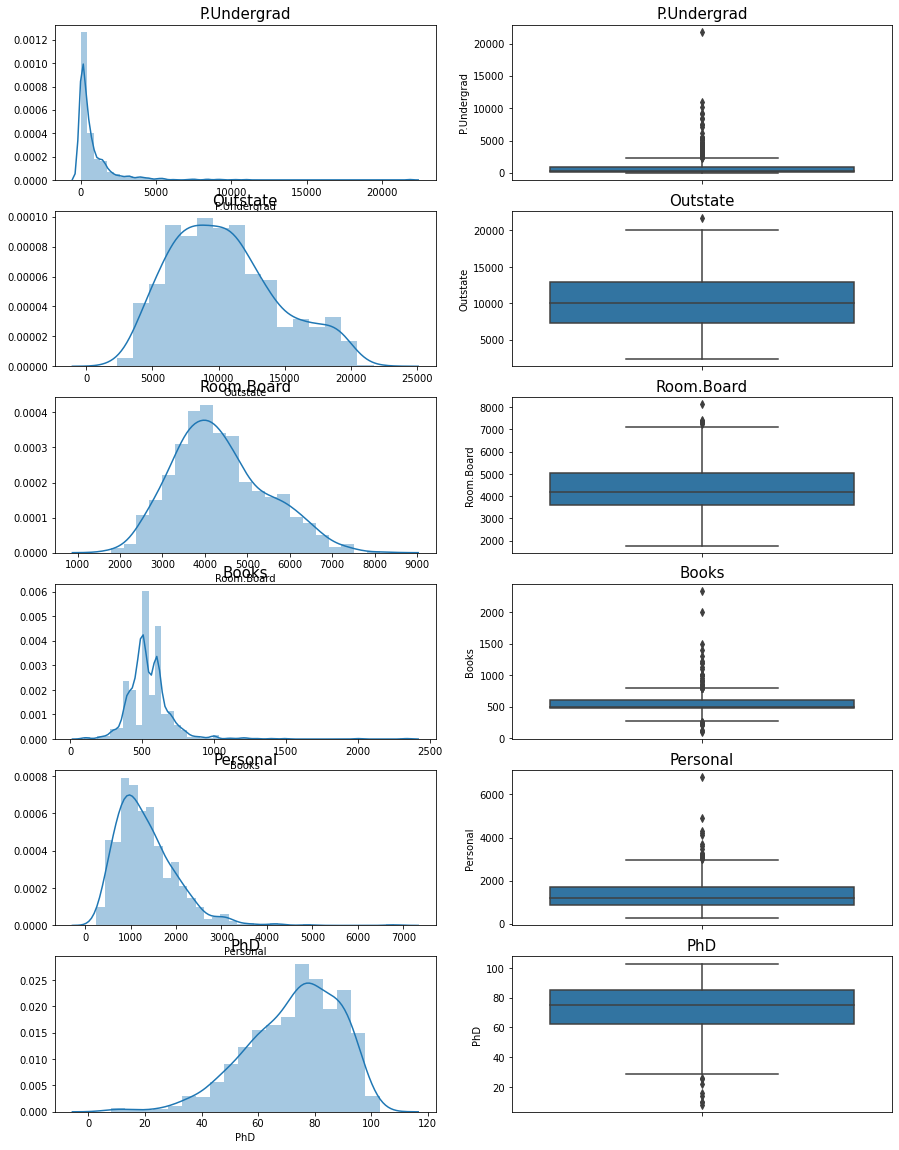

In [19]:
## Outlier check for below columns using boxplots

#P.Undergrad
#Outstate   
#Room.Board 
#Books      
#Personal   
#PhD        

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15, 20)

a = sns.distplot(df_education['P.Undergrad'] , ax=axes[0][0])
a.set_title("P.Undergrad",fontsize=15)
a = sns.boxplot(df_education['P.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title("P.Undergrad",fontsize=15)

a = sns.distplot(df_education['Outstate'] , ax=axes[1][0])
a.set_title("Outstate",fontsize=15)
a = sns.boxplot(df_education['Outstate'] , orient = "v" , ax=axes[1][1])
a.set_title("Outstate",fontsize=15)

a = sns.distplot(df_education['Room.Board'] , ax=axes[2][0])
a.set_title("Room.Board",fontsize=15)
a = sns.boxplot(df_education['Room.Board'] , orient = "v" , ax=axes[2][1])
a.set_title("Room.Board",fontsize=15)


a = sns.distplot(df_education['Books'] , ax=axes[3][0])
a.set_title("Books",fontsize=15)
a = sns.boxplot(df_education['Books'] , orient = "v" , ax=axes[3][1])
a.set_title("Books",fontsize=15)

a = sns.distplot(df_education['Personal'] , ax=axes[4][0])
a.set_title("Personal",fontsize=15)
a = sns.boxplot(df_education['Personal'] , orient = "v" , ax=axes[4][1])
a.set_title("Personal",fontsize=15)

a = sns.distplot(df_education['PhD'] , ax=axes[5][0])
a.set_title("PhD",fontsize=15)
a = sns.boxplot(df_education['PhD'] , orient = "v" , ax=axes[5][1])
a.set_title("PhD",fontsize=15)

plt.show()

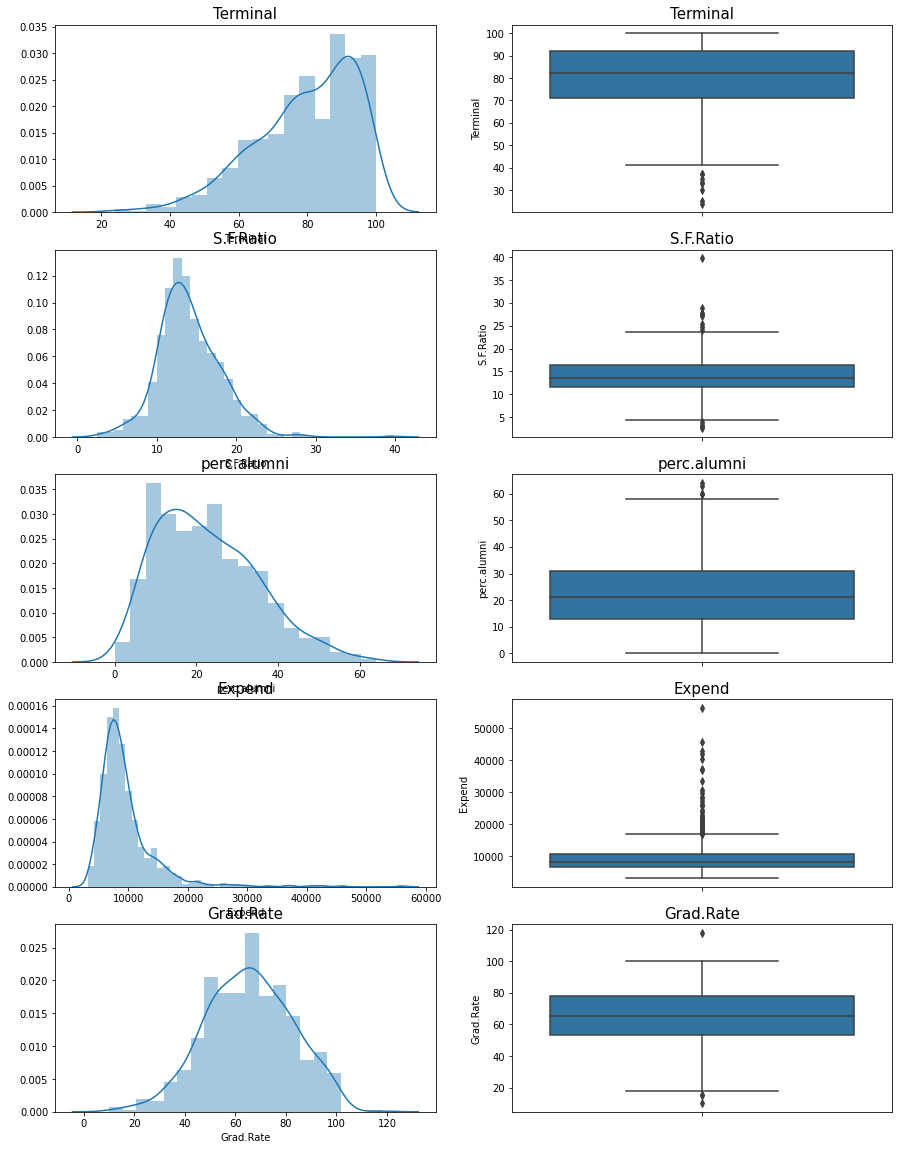

In [23]:
## Univariate Analysis

#Terminal    
#S.F.Ratio  
#perc.alumni
#Expend     
#Grad.Rate  
       
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 20)

a = sns.distplot(df_education['Terminal'] , ax=axes[0][0])
a.set_title("Terminal",fontsize=15)
a = sns.boxplot(df_education['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal",fontsize=15)

a = sns.distplot(df_education['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio",fontsize=15)
a = sns.boxplot(df_education['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio",fontsize=15)

a = sns.distplot(df_education['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni",fontsize=15)
a = sns.boxplot(df_education['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni",fontsize=15)


a = sns.distplot(df_education['Expend'] , ax=axes[3][0])
a.set_title("Expend",fontsize=15)
a = sns.boxplot(df_education['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend",fontsize=15)

a = sns.distplot(df_education['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate",fontsize=15)
a = sns.boxplot(df_education['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate",fontsize=15)

plt.show()

#Outlier Columns:

Apps        
,Accept      
,Enroll      
,Top10perc   
,F.Undergrad
,P.Undergrad 
,Outstate    
,Room.Board  
,Books       
,Personal
,PhD
,Terminal    
,S.F.Ratio   
,perc.alumni 
,Expend      
,Grad.Rate  

#Non Outlier Columns:

Top25perc 

# Bivariate Analysis

In [23]:
#Correlation of variables for original dataset
corr=df_education.corr(method='pearson')
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [68]:
# Check for highest correlation of variables
#corr[corr['Apps']>0.9]  #Apps-Accept
#corr[corr['Accept']      >0.9]  #Enroll-Accept
#corr[corr['Enroll']    >0.9]  #Enroll-F.Undergrad
#corr[corr['Top10perc']   >0.9] #NA
#corr[corr['Top25perc']   >0.9] #NA
#corr[corr['F.Undergrad'] >0.9]
#corr[corr['P.Undergrad'] >0.9]
#corr[corr['Outstate']    >0.9]
#corr[corr['Room.Board']  >0.9]
#corr[corr['Books']       >0.9]
#corr[corr['Personal']    >0.9]
#corr[corr['PhD']         >0.9]
#corr[corr['Terminal']    >0.9]
#corr[corr['S.F.Ratio']   >0.9]
#corr[corr['perc.alumni'] >0.9]
#corr[corr['Expend']      >0.9]
#corr[corr['Grad.Rate']   >0.9]

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Grad.Rate  0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

           P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Grad.Rate    -0.257001   0.57129    0.424942  0.001061 -0.269344  0.305038   

           Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Grad.Rate  0.289527   -0.30671     0.490898  0.390343        1.0

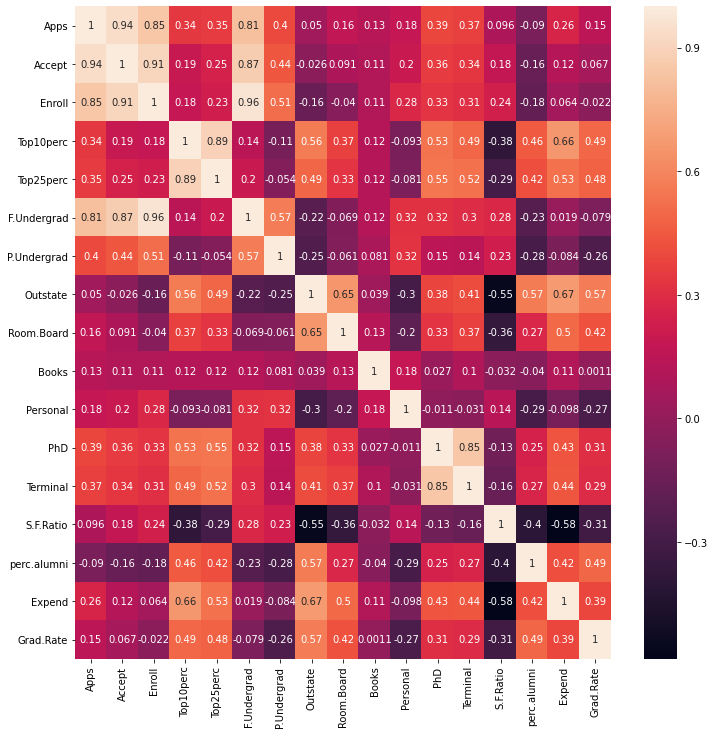

In [28]:
#Correlation representation in Heatmap
plt.subplots(figsize=(12,12))
sns.heatmap(df_education.corr(), annot=True)  # plot the correlation coefficients as a heatmap

#Below Variable have positive correlation

Apps-Accept

Enroll-Accept

Enroll-F.Undergrad

Top25perc-Top10perc

# Pair Plot

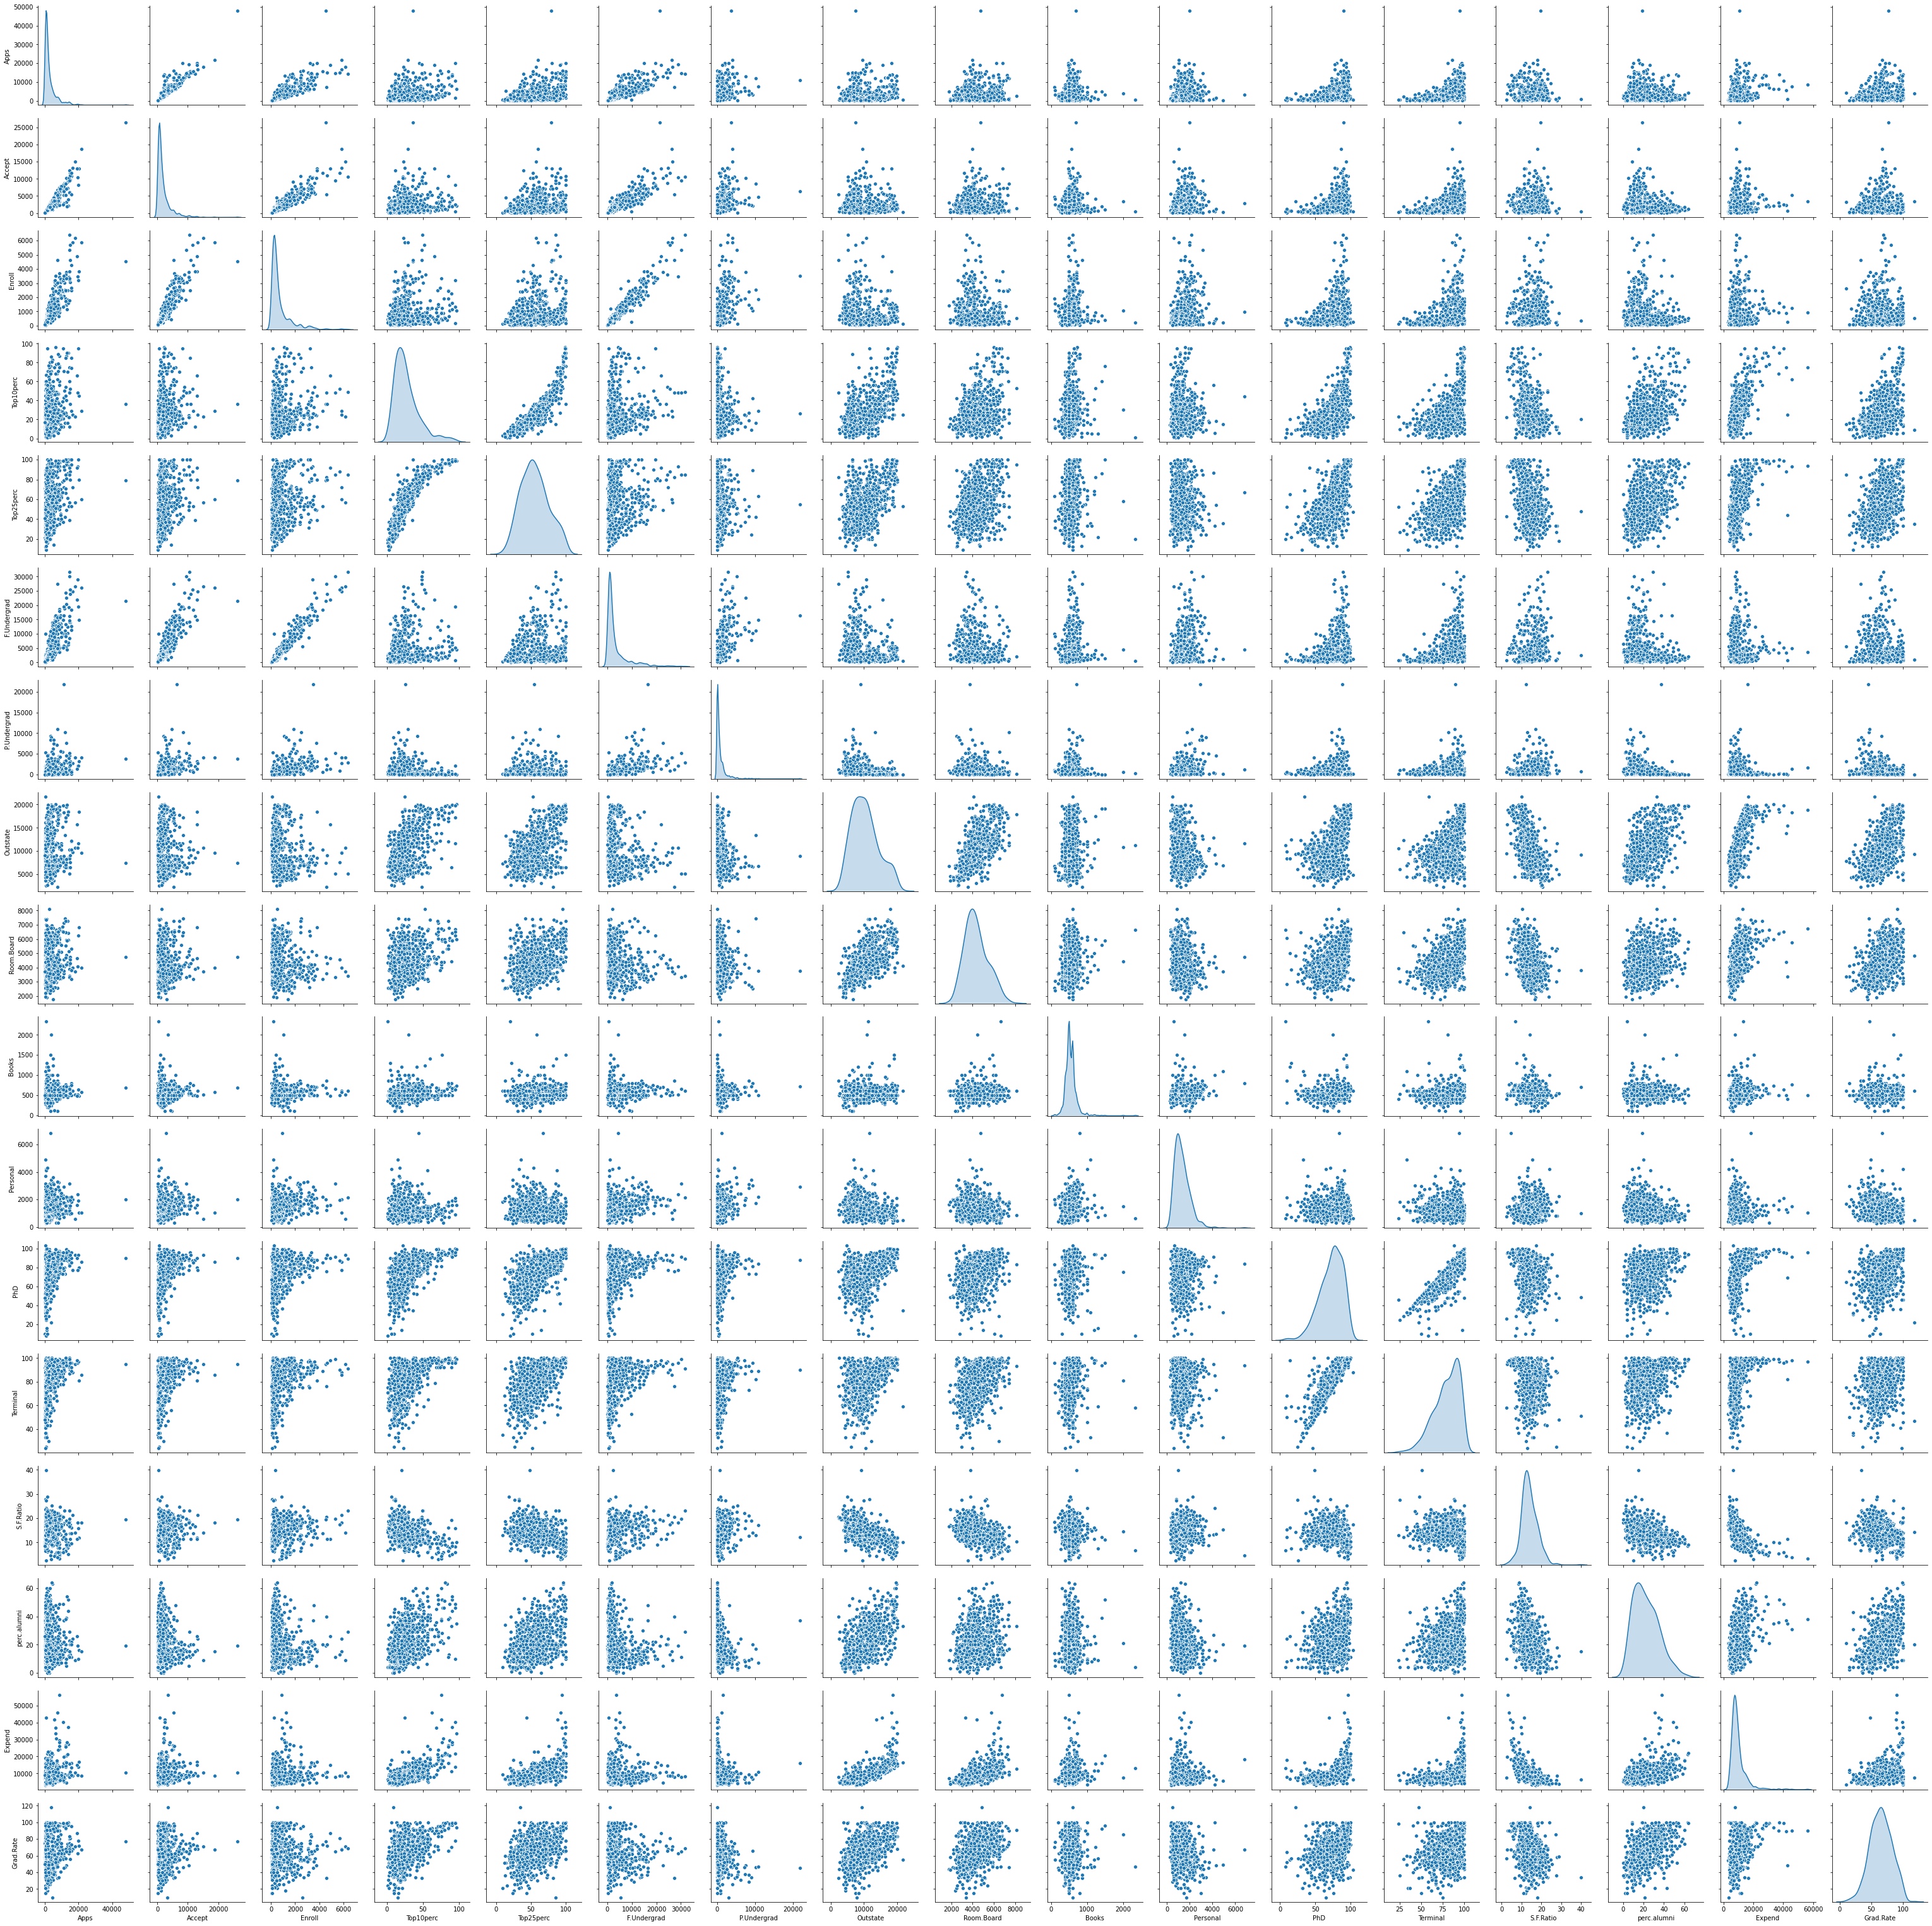

In [27]:
sns.pairplot(df_education,diag_kind='kde')

#By Looking into plot below combination is positively correlated

Apps-Accept : More Number of applications received, more Number of applications accepted

Enroll-Accept : Number of new students enrolled is more ,Number of applications accepted is more

Enroll-F.Undergrad : Number of new students enrolled is more,Number of full-time undergraduate students count is more

Top25perc-Top10perc : Percentage of new students from top 10% of Higher Secondary class are falling under the group Percentage of new students from top 25% of Higher Secondary class


#By Looking into plot below combination is negatively correlated
Expend-SF Ratio : The Instructional expenditure per student is slightly negative correlated with Student/faculty ratio

# Outlier Treatment

In [30]:
df_education.Apps.value_counts()
#Continuous Data

663     3
440     3
1006    3
1243    2
1800    2
       ..
2994    1
659     1
1500    1
657     1
1458    1
Name: Apps, Length: 711, dtype: int64

In [31]:
df_education.Accept.value_counts()
#Continuous Data

452     4
384     3
494     3
340     3
562     3
       ..
668     1
1691    1
4761    1
664     1
1026    1
Name: Accept, Length: 693, dtype: int64

In [32]:
df_education.Enroll.value_counts()
#Continuous Data

295     5
177     5
458     4
172     4
176     4
       ..
570     1
572     1
573     1
579     1
2464    1
Name: Enroll, Length: 581, dtype: int64

In [33]:
df_education.Top10perc.value_counts()
#Continuous Data

20    37
10    35
12    32
16    31
15    28
      ..
66     1
89     1
65     1
54     1
96     1
Name: Top10perc, Length: 82, dtype: int64

In [34]:
df_education.Top25perc.value_counts()
#Continuous Data

55    20
60    20
50    19
36    19
52    18
      ..
16     1
14     1
97     1
12     1
9      1
Name: Top25perc, Length: 89, dtype: int64

In [35]:
df_education['F.Undergrad'].value_counts()
#Continuous Data

1345    3
1306    3
1115    3
662     3
500     3
       ..
1698    1
7368    1
1695    1
2718    1
1024    1
Name: F.Undergrad, Length: 714, dtype: int64

In [36]:
df_education['P.Undergrad'].value_counts()
#Continuous Data

30      7
166     6
35      5
1       4
95      4
       ..
2196    1
588     1
3661    1
2640    1
2458    1
Name: P.Undergrad, Length: 566, dtype: int64

In [37]:
df_education.Outstate.value_counts()
#Continuous Data

6550     13
8400      5
10500     5
8840      5
9900      4
         ..
12925     1
8828      1
9850      1
10870     1
7168      1
Name: Outstate, Length: 640, dtype: int64

In [38]:
df_education['Room.Board'].value_counts()
#Continuous Data

4100    9
3700    7
3600    7
4200    6
3400    6
       ..
6690    1
3352    1
5760    1
6790    1
3075    1
Name: Room.Board, Length: 553, dtype: int64

In [39]:
df_education.Books.value_counts()
#Continuous Data

500     178
600     128
400      76
450      60
550      41
       ... 
569       1
768       1
576       1
585       1
1100      1
Name: Books, Length: 122, dtype: int64

In [82]:
df_education.Personal.value_counts()


1000    45
1200    33
1500    32
800     32
900     27
        ..
2681     1
1656     1
3700     1
625      1
1024     1
Name: Personal, Length: 294, dtype: int64

In [40]:
df_education.PhD.value_counts()
#Continuous Data

77    26
73    24
90    23
81    21
82    21
      ..
31     1
32     1
34     1
41     1
8      1
Name: PhD, Length: 78, dtype: int64

In [41]:
df_education.Terminal.value_counts()
#Continuous Data

96    30
92    29
90    28
95    26
89    26
      ..
49     1
35     1
30     1
25     1
24     1
Name: Terminal, Length: 65, dtype: int64

In [42]:
df_education['S.F.Ratio'].value_counts()
#Continuous Data

12.1    15
11.3    14
12.5    13
13.3    13
11.1    13
        ..
8.5      1
2.5      1
22.4     1
27.8     1
7.5      1
Name: S.F.Ratio, Length: 173, dtype: int64

In [43]:
df_education['perc.alumni'].value_counts()
#Continuous Data

10    32
16    31
17    27
26    27
24    26
      ..
63     1
50     1
57     1
58     1
64     1
Name: perc.alumni, Length: 61, dtype: int64

In [44]:
df_education.Expend.value_counts()
#Continuous Data

7041     2
7940     2
5935     2
4900     2
10872    2
        ..
7936     1
6817     1
7840     1
8546     1
7170     1
Name: Expend, Length: 744, dtype: int64

In [45]:
df_education['Grad.Rate'].value_counts()
#Continuous Data

72     24
67     23
58     22
63     22
65     21
       ..
118     1
27      1
30      1
32      1
10      1
Name: Grad.Rate, Length: 81, dtype: int64

# Outlier replacement with (+/-)1.5*IQR

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [48]:
#Apps       
#Accept     
#Enroll     
#Top10perc   
#F.Undergrad

lratio,uratio=remove_outlier(df_education['Apps'])
df_education['Apps']=np.where(df_education['Apps']>uratio,uratio,df_education['Apps'])
df_education['Apps']=np.where(df_education['Apps']<lratio,lratio,df_education['Apps'])

lratio,uratio=remove_outlier(df_education['Accept'])
df_education['Accept']=np.where(df_education['Accept']>uratio,uratio,df_education['Accept'])
df_education['Accept']=np.where(df_education['Accept']<lratio,lratio,df_education['Accept'])

lratio,uratio=remove_outlier(df_education['Enroll'])
df_education['Enroll']=np.where(df_education['Enroll']>uratio,uratio,df_education['Enroll'])
df_education['Enroll']=np.where(df_education['Enroll']<lratio,lratio,df_education['Enroll'])

lratio,uratio=remove_outlier(df_education['Top10perc'])
df_education['Top10perc']=np.where(df_education['Top10perc']>uratio,uratio,df_education['Top10perc'])
df_education['Top10perc']=np.where(df_education['Top10perc']<lratio,lratio,df_education['Top10perc'])

lratio,uratio=remove_outlier(df_education['F.Undergrad'])
df_education['F.Undergrad']=np.where(df_education['F.Undergrad']>uratio,uratio,df_education['F.Undergrad'])
df_education['F.Undergrad']=np.where(df_education['F.Undergrad']<lratio,lratio,df_education['F.Undergrad'])

In [49]:
#P.Undergrad 
#Outstate    
#Room.Board  
#Books       
#Personal 
#PhD

lratio,uratio=remove_outlier(df_education['P.Undergrad'])
df_education['P.Undergrad']=np.where(df_education['P.Undergrad']>uratio,uratio,df_education['P.Undergrad'])
df_education['P.Undergrad']=np.where(df_education['P.Undergrad']<lratio,lratio,df_education['P.Undergrad'])

lratio,uratio=remove_outlier(df_education['Outstate'])
df_education['Outstate']=np.where(df_education['Outstate']>uratio,uratio,df_education['Outstate'])
df_education['Outstate']=np.where(df_education['Outstate']<lratio,lratio,df_education['Outstate'])

lratio,uratio=remove_outlier(df_education['Room.Board'])
df_education['Room.Board']=np.where(df_education['Room.Board']>uratio,uratio,df_education['Room.Board'])
df_education['Room.Board']=np.where(df_education['Room.Board']<lratio,lratio,df_education['Room.Board'])

lratio,uratio=remove_outlier(df_education['Books'])
df_education['Books']=np.where(df_education['Books']>uratio,uratio,df_education['Books'])
df_education['Books']=np.where(df_education['Books']<lratio,lratio,df_education['Books'])

lratio,uratio=remove_outlier(df_education['Personal'])
df_education['Personal']=np.where(df_education['Personal']>uratio,uratio,df_education['Personal'])
df_education['Personal']=np.where(df_education['Personal']<lratio,lratio,df_education['Personal'])

lratio,uratio=remove_outlier(df_education['PhD'])
df_education['PhD']=np.where(df_education['PhD']>uratio,uratio,df_education['PhD'])
df_education['PhD']=np.where(df_education['PhD']<lratio,lratio,df_education['PhD'])

In [50]:
#Terminal   
#S.F.Ratio  
#perc.alumni       
#Expend     
#Grad.Rate  

lratio,uratio=remove_outlier(df_education['Terminal'])
df_education['Terminal']=np.where(df_education['Terminal']>uratio,uratio,df_education['Terminal'])
df_education['Terminal']=np.where(df_education['Terminal']<lratio,lratio,df_education['Terminal'])

lratio,uratio=remove_outlier(df_education['S.F.Ratio'])
df_education['S.F.Ratio']=np.where(df_education['S.F.Ratio']>uratio,uratio,df_education['S.F.Ratio'])
df_education['S.F.Ratio']=np.where(df_education['S.F.Ratio']<lratio,lratio,df_education['S.F.Ratio'])

lratio,uratio=remove_outlier(df_education['perc.alumni'])
df_education['perc.alumni']=np.where(df_education['perc.alumni']>uratio,uratio,df_education['perc.alumni'])
df_education['perc.alumni']=np.where(df_education['perc.alumni']<lratio,lratio,df_education['perc.alumni'])

lratio,uratio=remove_outlier(df_education['Expend'])
df_education['Expend']=np.where(df_education['Expend']>uratio,uratio,df_education['Expend'])
df_education['Expend']=np.where(df_education['Expend']<lratio,lratio,df_education['Expend'])

lratio,uratio=remove_outlier(df_education['Grad.Rate'])
df_education['Grad.Rate']=np.where(df_education['Grad.Rate']>uratio,uratio,df_education['Grad.Rate'])
df_education['Grad.Rate']=np.where(df_education['Grad.Rate']<lratio,lratio,df_education['Grad.Rate'])

#  Scale the variables and write the inference for using the type of scaling function for this case study.

# Check Outliers after imputation

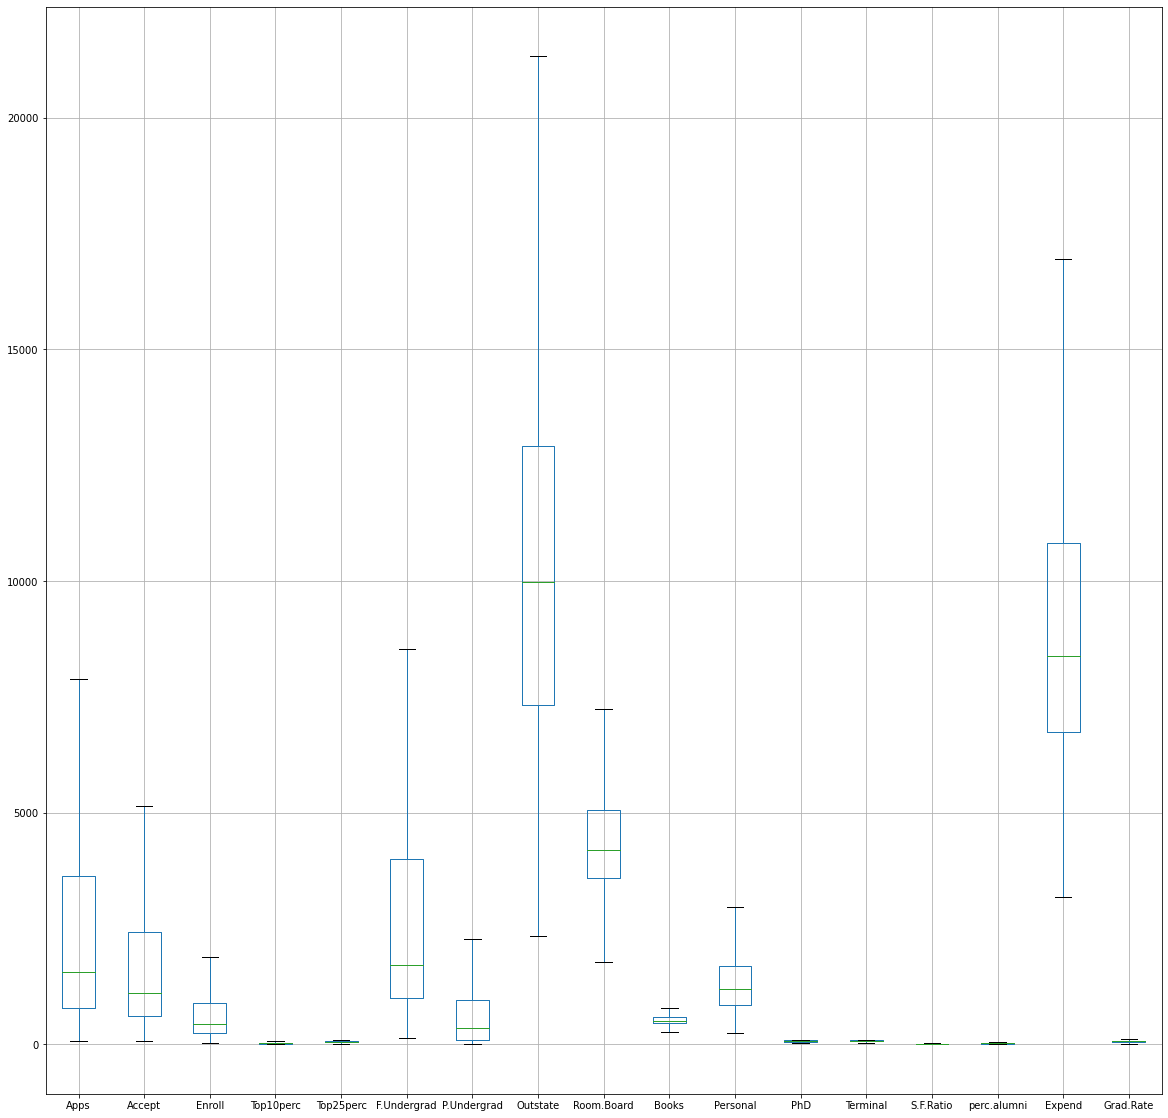

In [51]:
df_education.boxplot(figsize=(20,20))

In [115]:
#Dropping Name field from Dtaframe as it is object and will not add any imporatnce to PCA

In [52]:
df_education=df_education.drop(['Names'],axis=1)
df_education.head(1)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0         52       2885.0        537.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   

   perc.alumni  Expend  Grad.Rate  
0         12.0  7041.0       60.0

In [ ]:
#Steps for PCA

1.Missing and Outlier treatment
2.Standerdization of data
3.PCA procedure - Covariance matrix, Eigen values, Vectors,Screeplots,CUmulative summary

# STANDERDIZATION of data

In [53]:
from scipy.stats import zscore
data_new=df_education.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

1.Converting variables with different scales of measurements into a single scale

2.Using Zscore method for Scaling the variables

3.Normalizes the data using the formula (x-mean)/standard deviation

#  Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

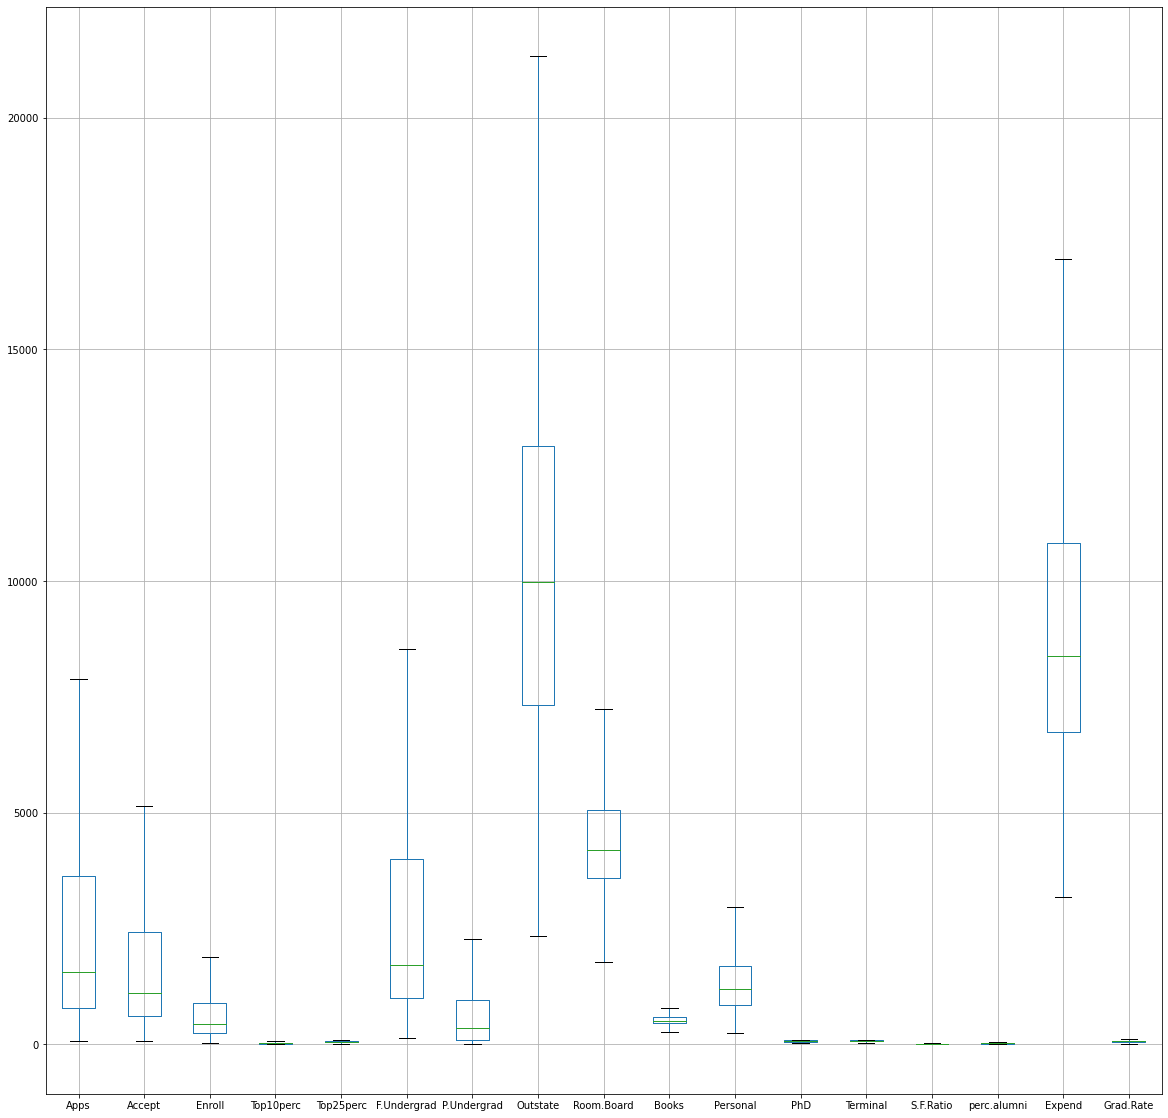

In [86]:
#Outlier check before Scaling. With the assumption thatOutlier treatment to be done before scaling

df_education.boxplot(figsize=(20,20))

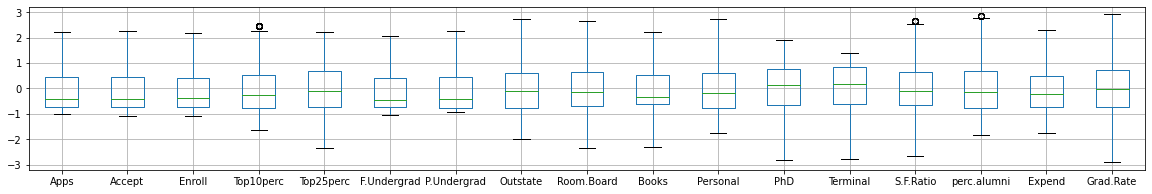

In [55]:
#Outlier Check after standerzation
data_new.boxplot(figsize=(20,3))

#Inference

1.Almost all original dataset is having the outliers.

2.After outliers imputation on original dataset there was no column having outlier issue

3.Once Scaling is done there are 3 columns retained with outlier issue - Top10perc, S.F.Ratio,perc.alumni

4. Mean is alomost 0 and Standard deviation is rounded to 1 after scaling

In [87]:
#Describe of standerdized data
data_new.describe().T

#After standerdization  Top10Perc,SF Ratio and perc.alumni columns have outliers

count          mean       std       min       25%       50%  \
Apps         777.0  1.234534e-16  1.000644 -1.028801 -0.741686 -0.418631   
Accept       777.0  1.340626e-16  1.000644 -1.099832 -0.750362 -0.417972   
Enroll       777.0  1.521645e-16  1.000644 -1.097636 -0.734325 -0.397341   
Top10perc    777.0 -2.250452e-18  1.000644 -1.659526 -0.760506 -0.246780   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.911679e-16  1.000644 -1.036373 -0.720271 -0.455309   
P.Undergrad  777.0 -9.573352e-17  1.000644 -0.914882 -0.783562 -0.423133   
Outstate     777.0 -1.583175e-16  1.000644 -2.015414 -0.776337 -0.112014   
Room.Board   777.0 -1.900382e-17  1.000644 -2.362866 -0.695838 -0.142609   
Books        777.0 -4.465183e-16  1.000644 -2.296251 -0.602889 -0.342372   
Personal     777.0 -9.605501e-17  1.000644 -1.762874 -0.777836 -0.203230   
PhD          777.0  4.232636e-16  1.000644 -2.839817 -0.675837  0.139575   
Terminal     777.0  2.460494e-16  1.000644 -2.785068 -0.607208  0.153315   
S.F.Ratio    777.0  3.635016e-16  1.000644 -2.657805 -0.674610 -0.119315   
perc.alumni  777.0  5.765444e-17  1.000644 -1.844686 -0.789281 -0.139801   
Expend       777.0  1.148802e-16  1.000644 -1.766640 -0.716353 -0.237316   
Grad.Rate    777.0 -2.743408e-16  1.000644 -2.916759 -0.727809 -0.027345   

                  75%       max  
Apps         0.434864  2.199689  
Accept       0.445193  2.238524  
Enroll       0.424058  2.161632  
Top10perc    0.523809  2.450281  
Top25perc    0.667104  2.233391  
F.Undergrad  0.396277  2.071100  
P.Undergrad  0.434633  2.261926  
Outstate     0.618245  2.710119  
Room.Board   0.637234  2.636841  
Books        0.526019  2.219381  
Personal     0.617635  2.710841  
PhD          0.766815  1.895848  
Terminal     0.844699  1.397806  
S.F.Ratio    0.647520  2.630716  
perc.alumni  0.672049  2.864044  
Expend       0.485364  2.287940  
Grad.Rate    0.731490  2.920440

#  Comment on the comparison between covariance and the correlation matrix.

In [56]:
#Correlation of standerdized data
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

# Create a covariance matrix for identifying Principal components

In [58]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

# Comparing Correlation and Covarince Matrix

In [59]:
# without Scaling lets check out correlation matrix
df_corr = df_education.copy()
df_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

#Conclusion :

1.Correlation of Original Dataframe = Correlation of Scaled Dataframe = Covariance of the Scaled Datagrame

2.From 3 approaches Correlation of Original Dataframe,Correlation of Scaled Dataframe,Covariance of the Scaled Datagrame we have the same result for Eigen Vector and Eigen values

3.After Scaling Correlation and Covariance have the same values


#  Build the covariance matrix, eigenvalues and eigenvector.

# COVARIANCE MATRIX

In [88]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

# Identify eigen values and eigen vector

In [60]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272e-01 -3.53988202e-02 -6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02 -7.88293849e-02  3.69115031e-01
  -1.57211016e-01 -8.88656824e-02 -2.57455284e-01  2.89538833e-01
 

# Write the explicit form of the first PC (in terms of Eigen Vectors).

In [84]:
df_education.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [85]:
#PC1
eig_vecs[0]

array([-0.26217154,  0.31413626,  0.08101772, -0.09877617, -0.21989808,
        0.00218801, -0.02837151, -0.08994981,  0.130567  , -0.15646446,
       -0.08621328,  0.18216981, -0.59913764,  0.08997753,  0.08886979,
        0.5494284 ,  0.00541454])

Apps(-0.26217154) + Accept(0.31413626) + Enroll(0.08101772) + Top10perc(-0.09877617) + Top25perc(-0.21989808)+ 
F.Undergrad(0.00218801) +P.Undergrad(-0.02837151) + Outstate(-0.08994981) + Room.Board(0.130567) + Books(-0.15646446) + 
Personal(-0.08621328) + PhD(0.18216981) +Terminal(-0.59913764) + S.F.Ratio(0.08997753) + perc.alumni(0.08886979) + 
Expend(0.5494284) + Grad.Rate(0.00541454)

#  Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?Perform PCA and export the data of the Principal Component scores into a data frame.


# Cummulative Distribution of Eigen values

In [61]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


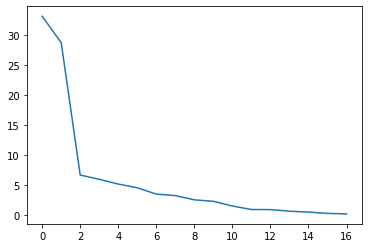

In [134]:
plt.plot(var_exp)

In [65]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
#PC1 is covering 33.26 percentage of data from the above graph and rest PC percentages are cumulated
#To cover 90% of data , we have to consider 8 principal components into consideration
#For Direct calculation , we will consider 6 principal components 

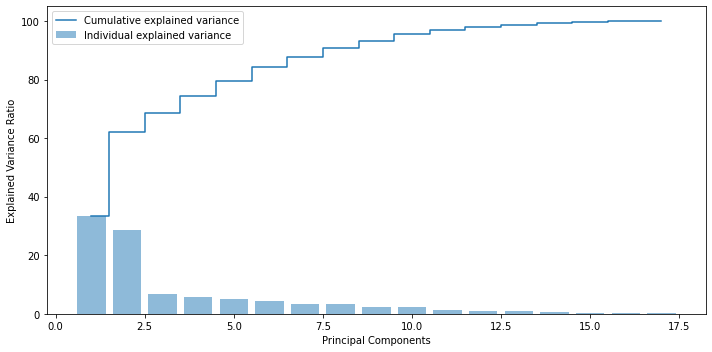

In [63]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Use PCA command from sklearn and find Principal Components

In [90]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 6)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493015,  1.04394672],
       [ 0.03004466,  2.12212779, -0.50151253, ...,  0.32216055,
         1.32596455, -1.42543835],
       [-1.00842223,  3.13894072, -0.03637349, ..., -0.58725906,
         0.07770871, -1.30027369],
       [-0.3668862 ,  2.45321178,  0.76599684, ...,  0.1752245 ,
         1.36851706,  0.7209176 ],
       [-0.69747652,  0.99486031, -1.02623648, ...,  0.50404428,
        -0.8227529 ,  1.05180975]])

In [75]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [91]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639])

In [92]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2])

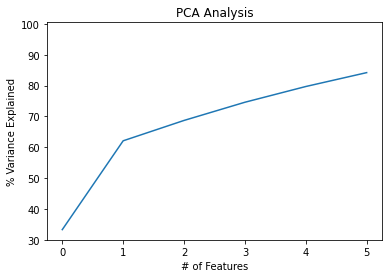

In [93]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

# Correlation between components and features

In [94]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   
5  0.002188 -0.016521 -0.068079  -0.088866  -0.027627    -0.051647   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   
5    -0.024538 -0.020386    0.237267  0.638605 -0.381496  0.003344  0.035412   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843  
5   0.468753     0.012567 -0.231562   0.313556

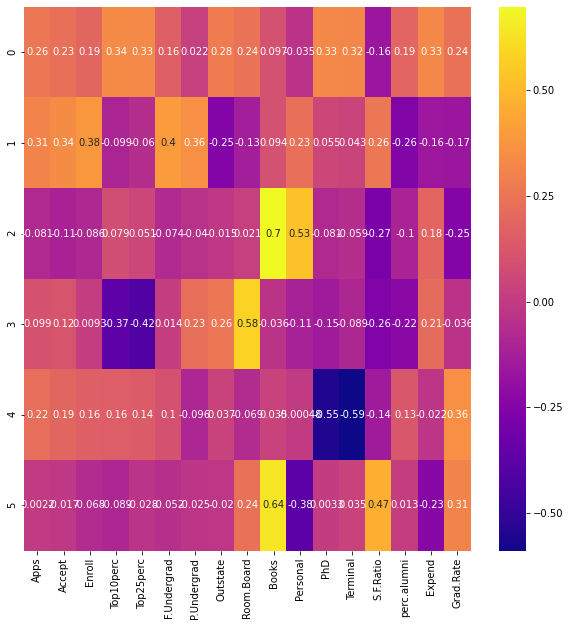

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap='plasma',annot=True)

In [ ]:
# This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself
# Principle Component 1[0] looks more related to Top Achivement strudents(Top10perc,Top25per,Phd,Terminal,Expenditure)  - We can label it as Top_Score property
#PC2[1 in heatmap] is covering almost students enrolment for the variables Apps,Accept and Enrollment. We can tag this as label Admission. 
#PC5[4 in heatmap] and PC6[5 in heatmap] are both covering for Phd and Terminal . We can Label it as faculty_degree
# Depending on relations ship, we could go ahead and label relationship with features

#  Mention the business implication of using the Principal Component Analysis for this case study.

PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.

This PCA can only be done on continous variables

# Business Implication : 

#From 17 Dimesions we are able to reduce the dimension to 6 to cover 84% of data
#PC1 will provide Top10perc,Top25per,Phd,Terminal,Expenditure dimensions correlation that ,Business gets better understanding on Top achievers in the college with expertized faculties details
#PC2 will provide Apps,Accept and Enrollment dimenions correlation that , Business can decide on students enrolment and which colleges have more admissions
#From PC5, Business can capture the best expertized faulties in colleges based on PhD and Terminal Degrees of faculty.
#PC6 will provide faculties which are not having Phd and Terminal Degree in colleges. 